In [5]:
#importing pandas libraray of dataframes
import pandas as pd

In [6]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

# importing classification model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# importing metrics library for validation 
from sklearn import metrics

In [7]:
#Reading csv data file
df=pd.read_csv('TheraBank_data.csv')

In [8]:
# Analysinging the data by using describe funtion , frmo the below matrix following findings can be derived 
# 1) Count is 5000 in each and eery variable , Hence there is no missing values observed
# 2) People between age of 35 and 55 are existed more in the dataset and etc

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
# Checking for any columns having otherthan numeric values
df[~df.applymap(np.isreal).all(1)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [7]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
df_temp=df.drop(columns=['Securities Account','CD Account','Online','CreditCard','Personal Loan'])

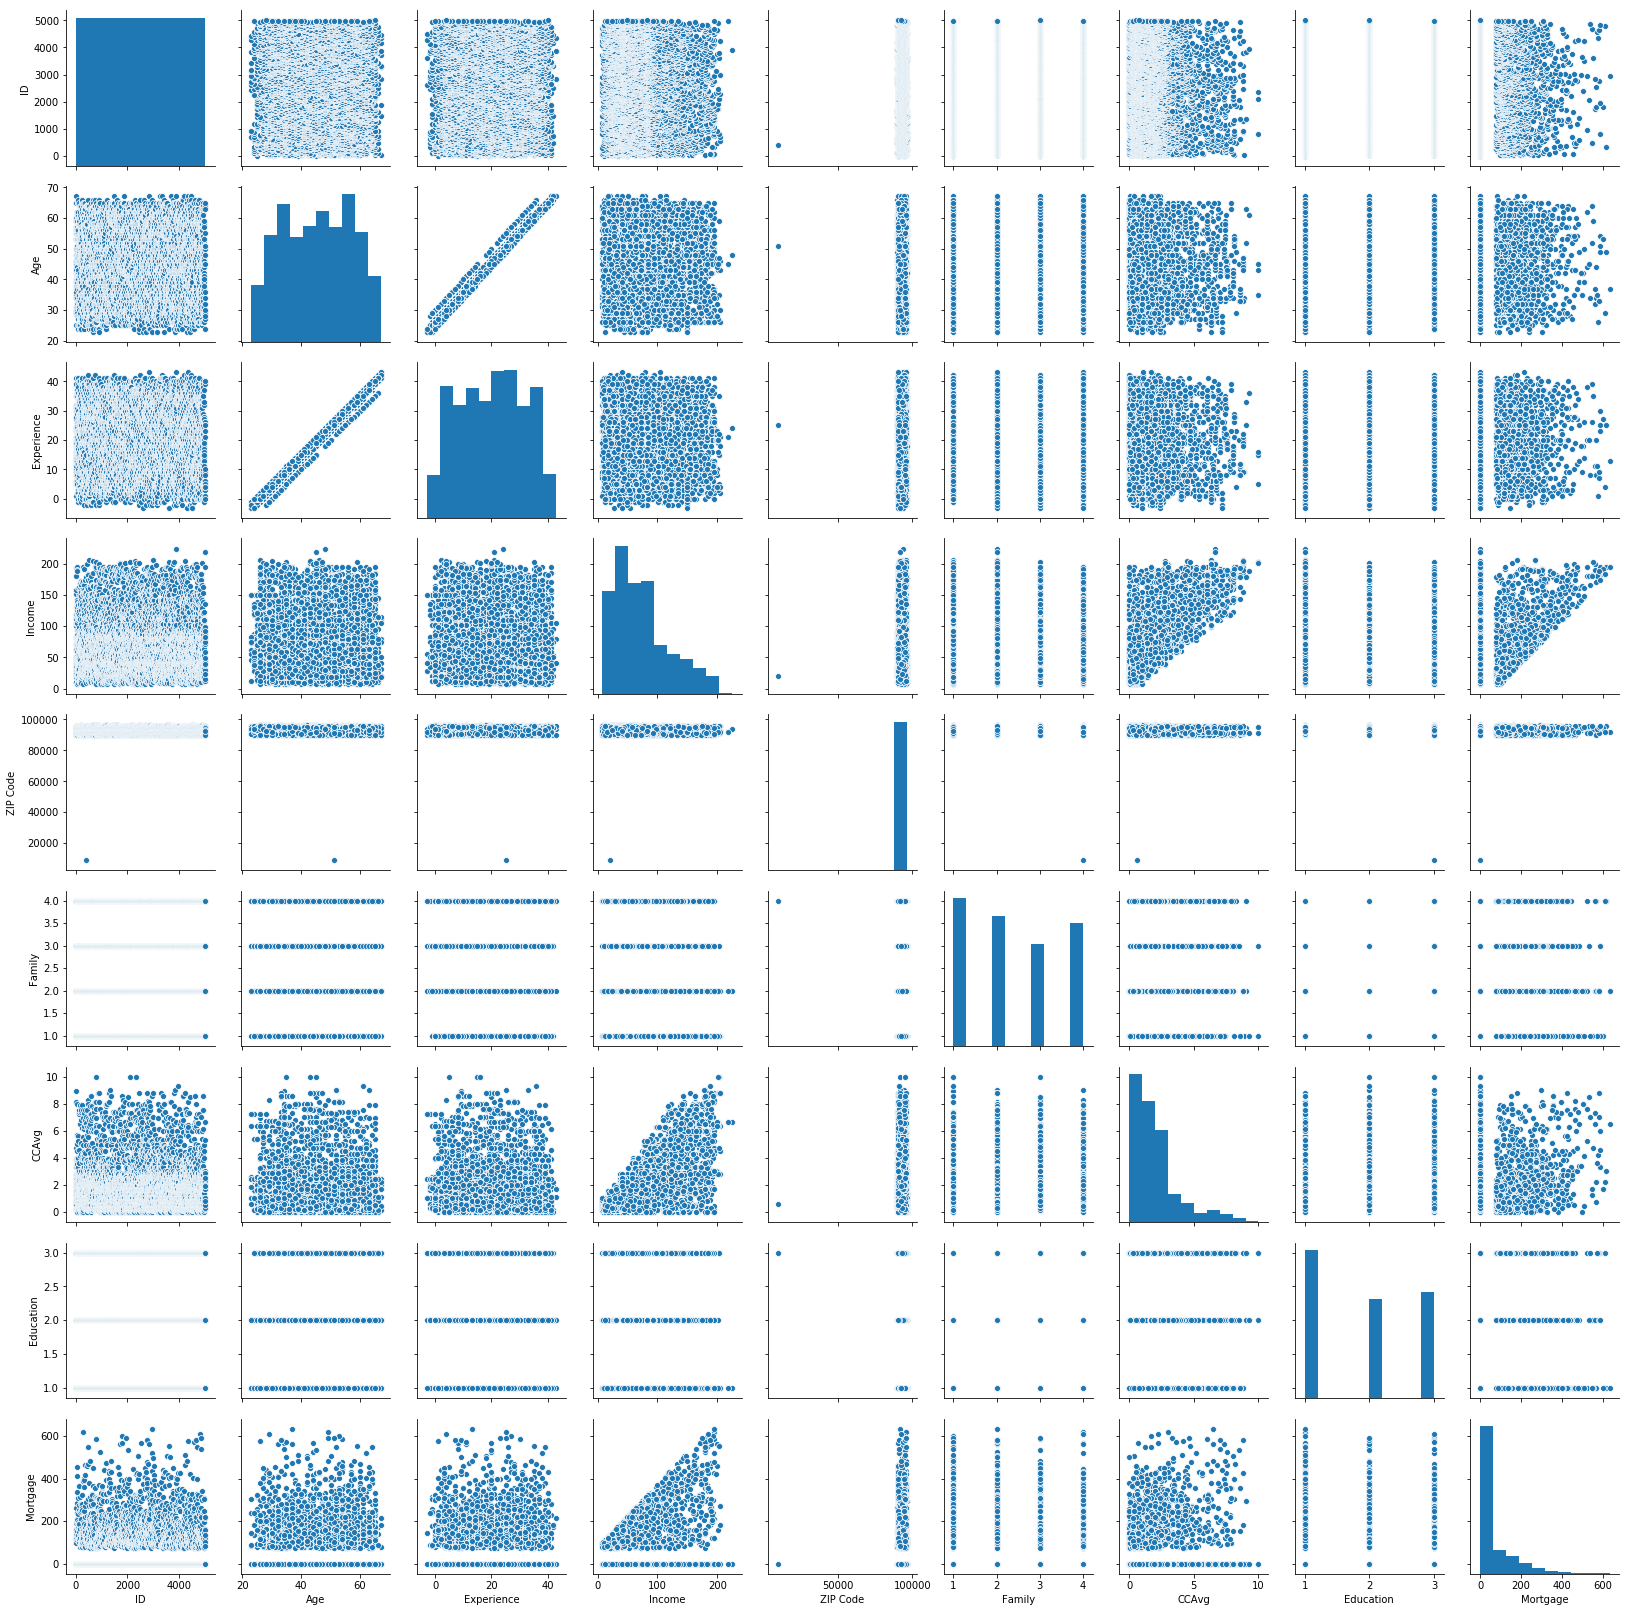

In [9]:
# Removing Categorical variables and checking the distribution of each variable with respective other variables. 
sns.pairplot(df_temp)
#Following observation can be made based on the scatter plot distribution 
#1) Irrespective of Age mortgage, Avg spedning of Credict card, Income are distributed randomly
# 2) As age increase expericence also increases as expected. 
# 3) As income increases Avg spedning of Credict card , mortage increase , right skewed. 

In [10]:
df.groupby(df['Personal Loan']).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


# Comments:-
    Let us look at the target column which is 'Personal Loan' to understand how the data is distributed amongst the various values
df.groupby(["Personal Loan"]).count()

# Most are not turned to take personal loan. The ratio is almost 1:9 in favor or Personal loan -O not taken.  The model's ability to predict the case of 
the group who are not taking the personal loan well 
# be better than predicting the case of who are all taking personal leave. 

In [9]:
#Dropping Zip Code as it will not contribute any value to dataframe
df=df.drop(columns=['ZIP Code'])

In [10]:
df.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


In [11]:
#Dropping ID as it will not contribute any value to dataframe
df=df.drop(columns=['ID'])

In [12]:
# Seperating dependent and independent variables , Assigning Personal Loan column to y
#y = df.pop('Personal Loan')
y=df.iloc[:,7:8]

In [13]:
y=df.iloc[:,7:8]

In [14]:
#Assigning independent variables to X
#y = df.pop('Personal Loan')
X=df.drop(columns=['Personal Loan'])

In [15]:
# splitting training and testing data in the ration of  70:30 
test_size = 0.30 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

In [16]:
#Fit the model USING Logistic Regression 
Logist_Model=LogisticRegression()

In [17]:
Logist_Model.fit(X_train, y_train)

C:\Users\Prasanna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Prasanna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
#Predict  the output USING Logistic Regression model
y_predict_Logist =Logist_Model.predict(X_test)

In [19]:
#Caliculating MODEL SCORE and Confusion Matrix
model_score = Logist_Model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict_Logist))


0.952
[[1353   19]
 [  53   75]]


In [36]:
report=metrics.classification_report(y_test, y_predict_Logist)

In [39]:
report

'              precision    recall  f1-score   support\n\n           0       0.96      0.99      0.97      1372\n           1       0.80      0.59      0.68       128\n\n   micro avg       0.95      0.95      0.95      1500\n   macro avg       0.88      0.79      0.82      1500\nweighted avg       0.95      0.95      0.95      1500\n'

In [41]:
#Fit the model USING Gaussian technique of Naive Bayes model
NB_Model = GaussianNB()

In [42]:
NB_Model.fit(X_train, y_train)

C:\Users\Prasanna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
#Predict  the output  USING Gaussian technique of Naive Bayes model
y_predict_NB = NB_Model.predict(X_test)

In [44]:
report=metrics.classification_report(y_test, y_predict_NB)

In [45]:
report

'              precision    recall  f1-score   support\n\n           0       0.96      0.91      0.94      1372\n           1       0.39      0.59      0.47       128\n\n   micro avg       0.89      0.89      0.89      1500\n   macro avg       0.67      0.75      0.70      1500\nweighted avg       0.91      0.89      0.90      1500\n'

In [49]:
#Caliculating MODEL SCORE and Confusion Matrix
model_score = Logist_Model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict_NB))


0.952
[[1254  118]
 [  53   75]]


In [80]:
#Fit the model USING K Neighbors classifer, Upon checking for various n_neighbors model is slightly performing better at n_neighbour is 3. 
# This check has been done between 1 to 200. 
NNH = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', 
                           metric = 'euclidean')
NNH.fit(X_train, y_train)
y_predict_KNN = NNH.predict(X_test)
model_score = Logist_Model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict_KNN))

0.952
[[1329   43]
 [  76   52]]


C:\Users\Prasanna\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [81]:
NNH.fit(X_train, y_train)

C:\Users\Prasanna\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [82]:
#Predict  the output  USING  K Neighbors classifer
y_predict_KNN = NNH.predict(X_test)

In [83]:
report=metrics.classification_report(y_test, y_predict_KNN)

In [84]:
report

'              precision    recall  f1-score   support\n\n           0       0.95      0.97      0.96      1372\n           1       0.55      0.41      0.47       128\n\n   micro avg       0.92      0.92      0.92      1500\n   macro avg       0.75      0.69      0.71      1500\nweighted avg       0.91      0.92      0.92      1500\n'

In [54]:
#Caliculating MODEL SCORE and Confusion Matrix
model_score = Logist_Model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict_KNN))

0.952
[[1339   33]
 [  85   43]]


Below Observation has been done:-
    Precision and recall of all models as follows below
                Precision       Recall
    Logistic    0- 0.96         0.99
    
                1- 0.80         0.59
    
    
    
    NaiveBayes  0-  0.96         0.91
    
                1- 0.39         0.59
        
    
    KNN         0- 0.95          0.97
    
                1- 0.55          0.41

        
Upon comparing the precision and recall Logistic Regression has given better prediction model when compare to other two models. 
